**Imports**

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean as dist
import syntheticdata_2gauss_shiftpast_20180426 as synth

**Organize Synth Data**

In [2]:
peak1_pos = pd.DataFrame(synth.x0_2_shift)
peak1_height = pd.DataFrame(synth.time_coeff_1)
peak2_pos = pd.DataFrame(synth.x0_1_shift)
peak2_height = pd.DataFrame(synth.time_coeff_2 * 0.3)

In [3]:
time_slice = [[[peak2_pos.loc[i][0], peak2_height.loc[i][0], 100.0, i], [peak1_pos.loc[i][0], peak1_height.loc[i][0], 50, i]] for i in range(500)]

**Sample Time Slice**

In [4]:
time_slice[327]

[[1178.9000000000149, 0.011401928122552293, 100.0, 327],
 [1169.1999999999703, 0.1949523712991825, 50, 327]]

**Classifier and Wrapper**

In [5]:
peak1_dist = [time_slice[0][0]]
peak2_dist = [time_slice[0][1]]

def euc_dist(time1, time2, peaks):
    for i in range(peaks):
        for j in range(peaks):
            distance = dist(time1[i][:-1], time2[j][:-1])
# Need to make these if, elif statements more generic
            if ( i == 0 and distance <= 50 ):
                peak1_dist.append(time2[j])
            elif ( i == 1 and distance <= 50):
                peak2_dist.append(time2[j])
    return

def dist_all_time(full_array, time):
    for n in range(time):
        euc_dist(full_array[n], full_array[n+1], 2)
    return
dist_all_time(time_slice, 499)

**Sample Clusters**

In [6]:
peak1_dist_df = pd.DataFrame(peak1_dist, columns=['Position', 'Height', 'Width', 'Time'])
peak1_dist_df.describe()

,Position,Height,Width,Time
count,500.000000,500.000000,500.0,500.000000
mean,1124.650000,0.059894,100.0,249.500000
std,101.137283,0.074254,0.0,144.481833
min,950.000000,0.002042,100.0,0.000000
25%,1037.325000,0.007109,100.0,124.750000
50%,1124.650000,0.024749,100.0,249.500000
75%,1211.975000,0.086167,100.0,374.250000
max,1299.300000,0.300000,100.0,499.000000


In [7]:
peak2_dist_df = pd.DataFrame(peak2_dist, columns=['Position', 'Height', 'Width', 'Time'])
peak2_dist_df.describe()

,Position,Height,Width,Time
count,500.000000,500.000000,500.0,500.000000
mean,1200.200000,0.368085,50.0,249.500000
std,57.792733,0.253554,0.0,144.481833
min,1100.400000,0.082496,50.0,0.000000
25%,1150.300000,0.153931,50.0,124.750000
50%,1200.200000,0.287223,50.0,249.500000
75%,1250.100000,0.535932,50.0,374.250000
max,1300.000000,1.000000,50.0,499.000000


**Feature Decay and Shift with Time**

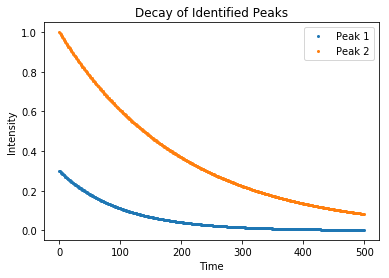

In [8]:
plt.plot(peak1_dist_df['Time'], peak1_dist_df['Height'], 'o', markersize = 2, label = 'Peak 1')
plt.plot(peak2_dist_df['Time'], peak2_dist_df['Height'], 'o', markersize = 2, label = 'Peak 2')
plt.title('Decay of Identified Peaks')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

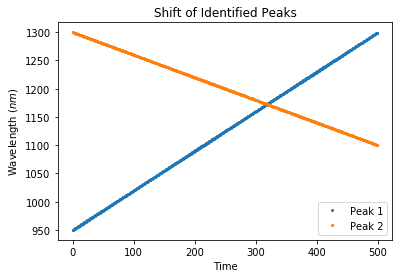

In [9]:
plt.plot(peak1_dist_df['Time'], peak1_dist_df['Position'], 'o', markersize = 2, label = 'Peak 1')
plt.plot(peak2_dist_df['Time'], peak2_dist_df['Position'], 'o', markersize = 2, label = 'Peak 2')
plt.title('Shift of Identified Peaks')
plt.xlabel('Time')
plt.ylabel('Wavelength $(nm)$')
plt.legend()
plt.show()